In [9]:
# extend the width of the notebook cells
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
display(HTML("<style>.output_result { width:95% !important; }</style>"))

# autoreload allows changes to modules on the fly (no need for reloading them after a change in the code)
%load_ext autoreload
%autoreload 2

In [41]:
from plot_smeft import *
from smeft_train import *
import pickle

## data

In [11]:
file_names = [
    f'/scratch-cbe/users/robert.schoefbeck/TMB/postprocessed/gen/v2/tschRefPointNoWidthRW/tschRefPointNoWidthRW_{n_file}.root:Events'
    for n_file in range(50)]

In [12]:
scalar_branches, vector_branches = get_branch_names()

In [13]:
scalar_events, vector_events, weights = load_data(file_names=file_names)

In [14]:
len(scalar_branches)

44

In [17]:
w0 = weights[:,0,np.newaxis]

In [18]:
w1_0 = weights[:,1,np.newaxis]/w0

In [19]:
dataset = JointDataset(x=scalar_events, y=(w0,w1_0))

In [20]:
data_loader = DataLoader(dataset, batch_size=1000)

## training

In [42]:
model = MLP(input_nfeatures=44, num_classes=1, hidden_layers=(300,100,100))
model

MLP(
  (mlp): Sequential(
    (0): BatchNorm1d(44, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Linear(in_features=44, out_features=300, bias=True)
    (2): ReLU()
    (3): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Linear(in_features=300, out_features=100, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Linear(in_features=100, out_features=100, bias=True)
    (8): ReLU()
    (9): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [152]:
file_name = 'model_21_10_22_1.pkl'

In [153]:
with open(file_name, 'wb') as f:
    pickle.dump(model, f)

In [150]:
with open(file_name, 'rb') as f:
    model1 = pickle.load(f)

In [ ]:
learn_lin_weight(model=model,
                 data_loader=data_loader,
                 n_epoch=500,
                 learning_rate=1e-5,
                 print_every=10,
                 save_every=20)

################ epoch: 501, loss: 4.179905238643755e-05


################ epoch: 511, loss: 4.118628033822347e-05


################ epoch: 521, loss: 4.064241968748661e-05


################ epoch: 531, loss: 4.0115508607385664e-05


################ epoch: 541, loss: 3.9607268476515856e-05


################ epoch: 551, loss: 3.9117303202829135e-05


################ epoch: 561, loss: 3.8641124636029645e-05


################ epoch: 571, loss: 3.818197701122017e-05


################ epoch: 581, loss: 3.7737960045802765e-05


################ epoch: 591, loss: 3.731175387855501e-05


################ epoch: 601, loss: 3.6896259029362e-05


################ epoch: 611, loss: 3.6494260989172744e-05


################ epoch: 621, loss: 3.6100704654984384e-05


################ epoch: 631, loss: 3.5719218161034405e-05


################ epoch: 641, loss: 3.5351327930754906e-05


################ epoch: 651, loss: 3.499437199394606e-05


################ epoch: 661, loss: 3.4646610849620174e-05


################ epoch: 671, loss: 3.43090272814095e-05


################ epoch: 681, loss: 3.3983082683874954e-05


################ epoch: 691, loss: 3.3667695515049445e-05


################ epoch: 701, loss: 3.336046106738877e-05


################ epoch: 711, loss: 3.306263421976041e-05


################ epoch: 721, loss: 3.2773129962748726e-05


################ epoch: 731, loss: 3.248810174838468e-05


################ epoch: 741, loss: 3.221523273566618e-05


################ epoch: 751, loss: 3.194599877787141e-05


################ epoch: 761, loss: 3.1682811659550225e-05


epoch: 266:  46%|██████████████████████▌                          | 160/347 [00:03<00:04, 42.97it/s]

## Evaluation

In [67]:

for i, (x,y,z) in enumerate(data_loader):
    if i>0:break
    for i in range(100):
        print((model(x))[i], z[i])
    #print(model(x))
    #print((y[:,1]/y[:,0]))
    #print(y)

tensor([-0.1054], grad_fn=<SelectBackward0>) tensor([-0.0769])
tensor([-0.2093], grad_fn=<SelectBackward0>) tensor([-0.1417])
tensor([-0.1624], grad_fn=<SelectBackward0>) tensor([-0.1715])
tensor([-0.1248], grad_fn=<SelectBackward0>) tensor([-0.1294])
tensor([-0.0749], grad_fn=<SelectBackward0>) tensor([-0.0494])
tensor([-0.1053], grad_fn=<SelectBackward0>) tensor([-0.1061])
tensor([-0.0707], grad_fn=<SelectBackward0>) tensor([-0.0617])
tensor([-0.0639], grad_fn=<SelectBackward0>) tensor([-0.0722])
tensor([-0.0572], grad_fn=<SelectBackward0>) tensor([-0.0611])
tensor([-0.2340], grad_fn=<SelectBackward0>) tensor([-0.2292])
tensor([0.0017], grad_fn=<SelectBackward0>) tensor([-0.0449])
tensor([-0.0880], grad_fn=<SelectBackward0>) tensor([-0.0542])
tensor([-0.1319], grad_fn=<SelectBackward0>) tensor([-0.1514])
tensor([-0.2952], grad_fn=<SelectBackward0>) tensor([-0.2856])
tensor([-0.0762], grad_fn=<SelectBackward0>) tensor([-0.0739])
tensor([-0.2056], grad_fn=<SelectBackward0>) tensor([-0.

In [39]:
test_file_names = [
    f'/scratch-cbe/users/robert.schoefbeck/TMB/postprocessed/gen/v2/tschRefPointNoWidthRW/tschRefPointNoWidthRW_{n_file}.root:Events'
    for n_file in range(50,60)]
test_scalar_events, test_vector_events, test_weights = load_data(file_names=test_file_names)
test_w0 = test_weights[:,0,np.newaxis]
test_w1_0 = test_weights[:,1,np.newaxis]/test_w0

In [73]:
pred=model(torch.tensor(scalar_events)).detach().numpy()
test_pred=model(torch.tensor(test_scalar_events)).detach().numpy()

### distribution of the true and learned relative linear weight

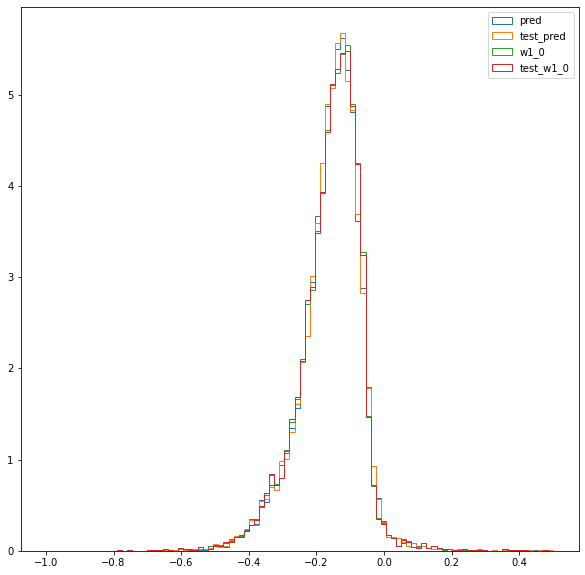

In [66]:
bins=np.histogram(np.hstack((pred,w1_0)),range=(-1.0,0.5),  bins=100)[1]
plt.figure(figsize=[10,10])
plt.hist(pred, histtype='step', bins=bins, range=(-1.0,0.5), label='pred', log=False, density=True)
plt.hist(test_pred, histtype='step', bins=bins, range=(-1.0,0.5), label='test_pred', log=False, density=True)
plt.hist(w1_0, histtype='step', bins=bins, range=(-1.0,0.5), label='w1_0', log=False, density=True)
plt.hist(test_w1_0, histtype='step', bins=bins, range=(-1.0,0.5), label='test_w1_0', log=False, density=True)
plt.legend()
plt.show()

### distribution of absolute errors

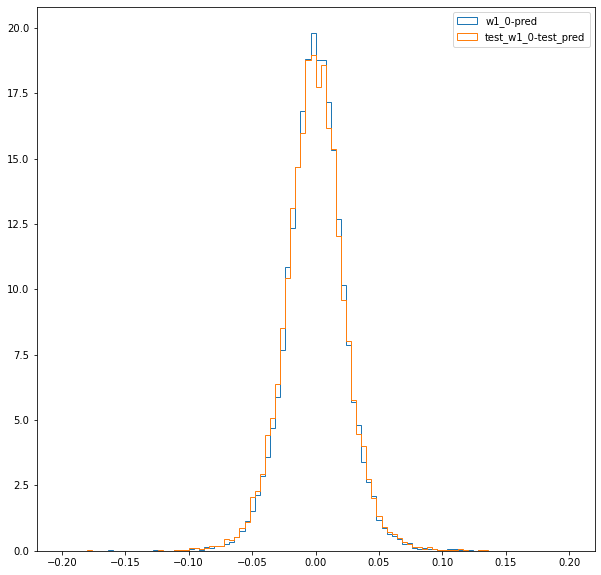

In [67]:
plt.figure(figsize=[10,10])
plt.hist((w1_0-pred), bins=100, histtype='step', label='w1_0-pred', range=(-0.2,0.2), log=False, density=True)
plt.hist((test_w1_0-test_pred), bins=100, histtype='step',label='test_w1_0-test_pred', range=(-0.2,0.2), log=False, density=True)
plt.legend()
plt.show()

### 2d hist truth vs prediction

In [59]:
from matplotlib import colors

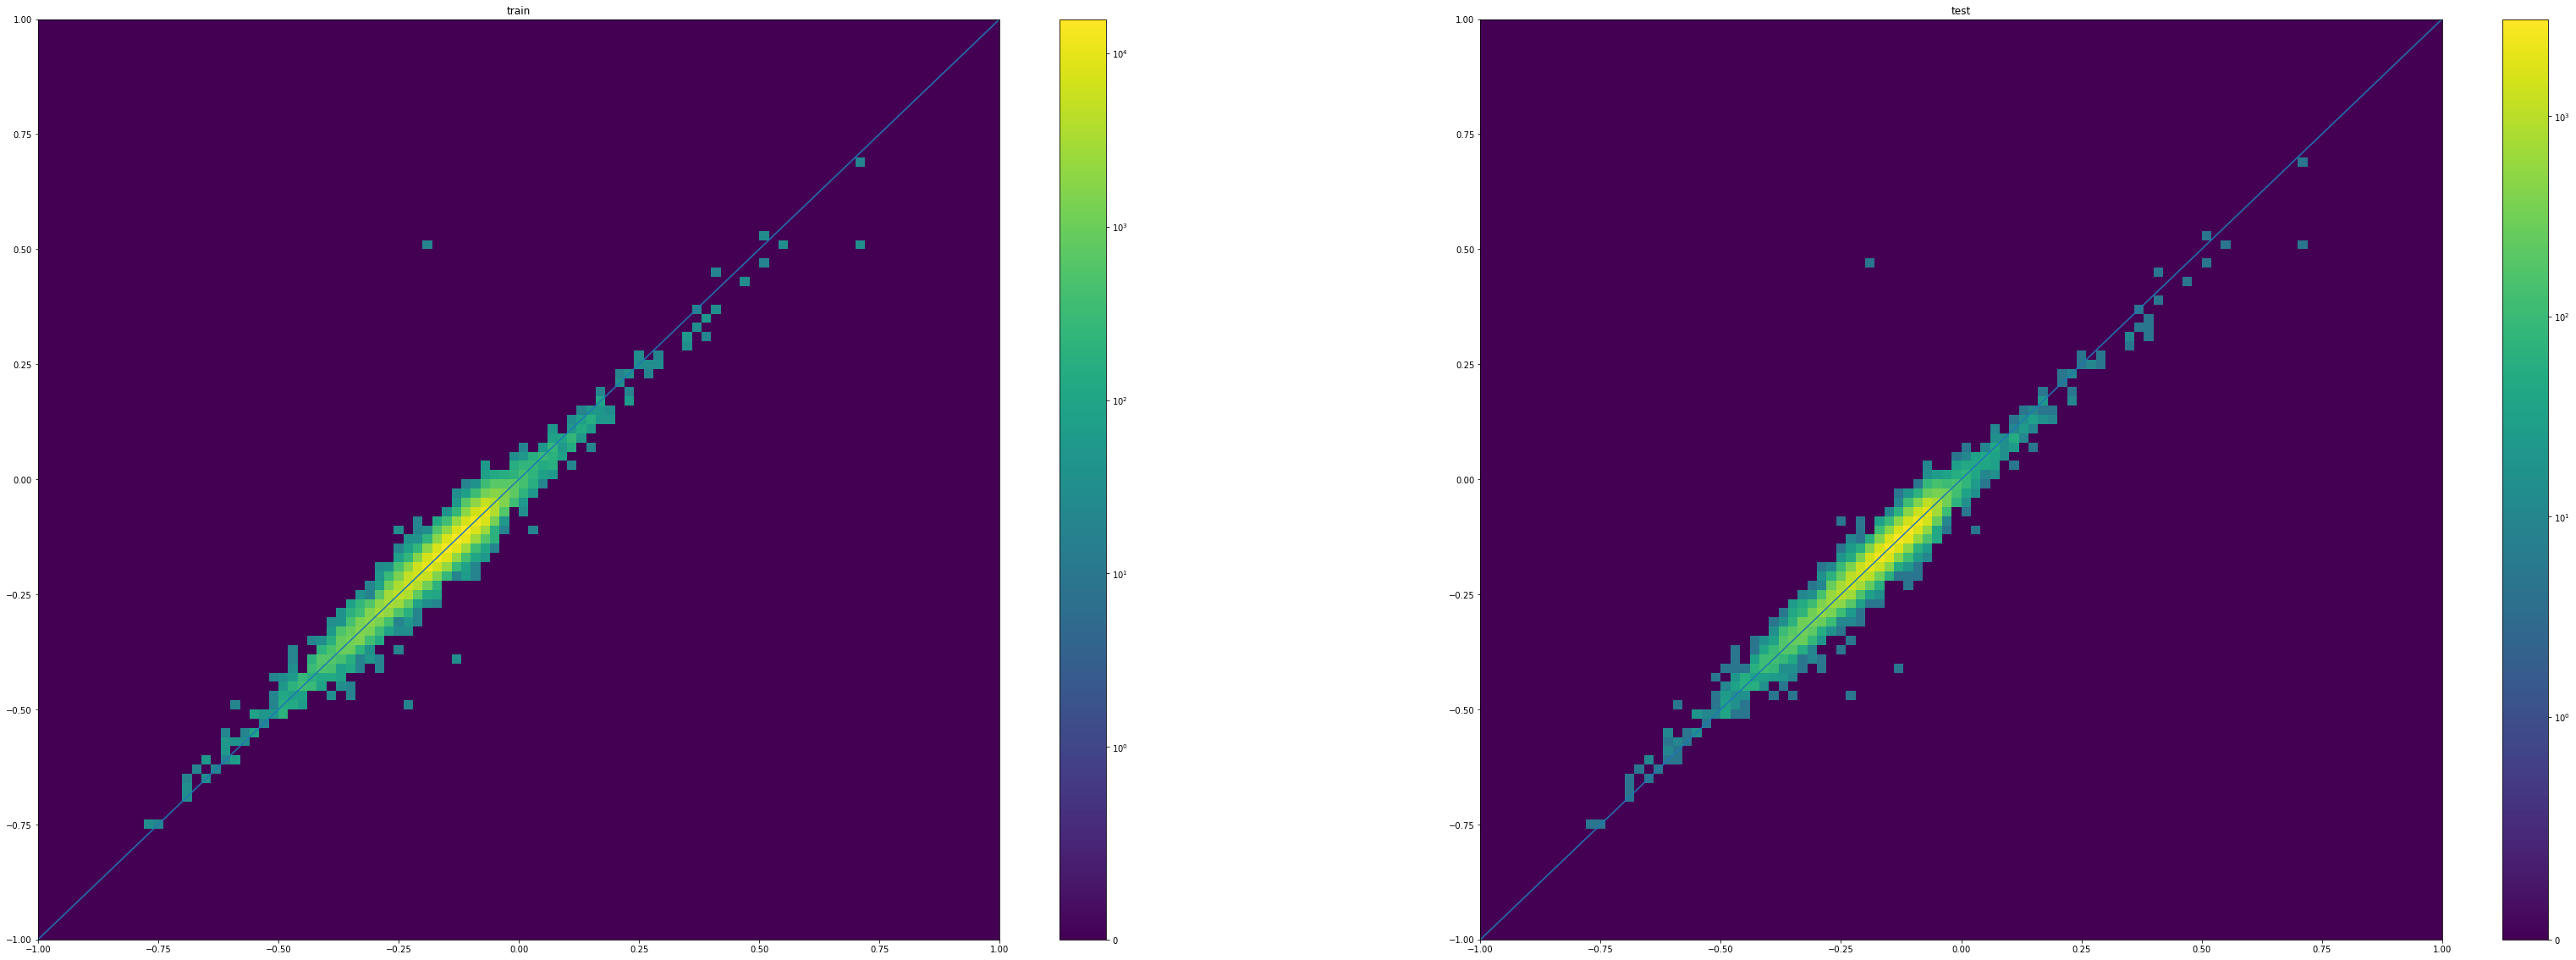

In [74]:
plt.subplots(figsize=[56,20])
plt.subplot(1,2,1)
plt.hist2d(w1_0.flatten(), pred.flatten(), range=[[-1.,1.],[-1.,1.]], bins=100, norm=colors.SymLogNorm(1))
plt.plot([-1,1],[-1,1])
plt.colorbar()
plt.title('train')
plt.subplot(1,2,2)
plt.hist2d(test_w1_0.flatten(), test_pred.flatten(), range=[[-1.,1.],[-1.,1.]], bins=100, norm=colors.SymLogNorm(1))
plt.plot([-1,1],[-1,1])
plt.colorbar()
plt.title('test')
plt.show()

## Histograms

saved file to /groups/hephy/cms/oskar.rothbacher/www/pytorch/genTops/genTops/hists.png


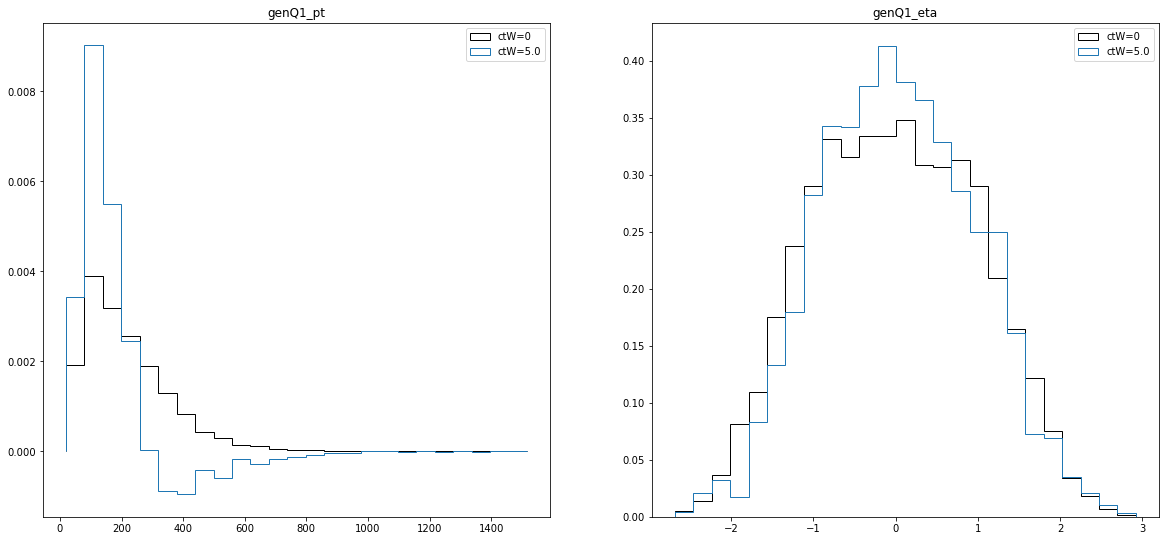

In [98]:
plot_eft_hists(data=scalar_events[:,:2],
               branch_list=scalar_branches[:2],
               weights=weights,
               bins=25,
               theta=(5.0,))

In [24]:
quantiles_005 = np.linspace(0,1,21)

In [25]:
quantiles_005

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [74]:
bins=np.quantile(scalar_events[:,0],quantiles_005)

(array([3809., 3811., 3820., 3807., 3814., 3818., 3815., 3813., 3809.,
        3814., 3816., 3815., 3810., 3816., 3812., 3815., 3808., 3814.,
        3819., 3814.]),
 array([-2.68316174, -1.59433842, -1.30670404, -1.10137415, -0.92858386,
        -0.76884013, -0.61271542, -0.46252388, -0.30635458, -0.1663415 ,
        -0.01870443,  0.12980531,  0.27301096,  0.44002056,  0.60248595,
         0.76152301,  0.92035466,  1.09389782,  1.31680667,  1.63048751,
         2.92064834]),
 [<matplotlib.patches.Polygon at 0x7f2ba2c01750>])

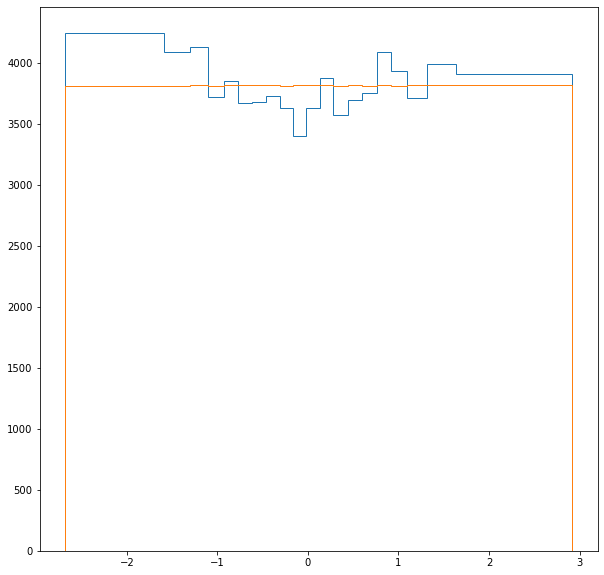

In [96]:
i=1
bins=np.quantile(scalar_events[:,i],quantiles_005)
plt.figure(figsize=[10,10])
plt.hist(scalar_events[:,i], weights=1+(weights[:,0]-weights[:,0].mean())/weights[:,0].std(), bins=bins, histtype='step', density=False)
plt.hist(scalar_events[:,i], bins=bins, histtype='step', density=False)

## LLR plots

In [130]:
def llr_poisson(n,lmbd_0, lmbd):
    return n * np.log(lmbd/lmbd_0) - lmbd -lmbd_0

In [131]:
n = 10; lmbd_0 = 10
x_plot = np.linspace(lmbd_0-3*np.sqrt(lmbd_0), lmbd_0+3*np.sqrt(lmbd_0), 1000)

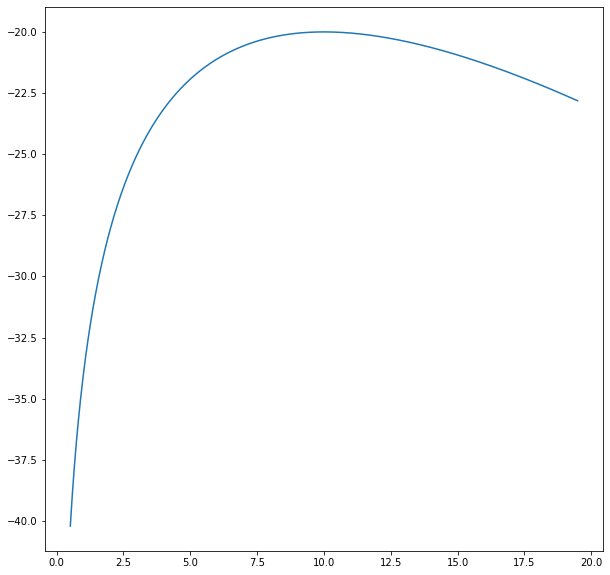

In [138]:
plt.figure(figsize=[10,10])
plt.plot(x_plot, llr_poisson(n, lmbd_0, x_plot))